# Red Black Graph - a DAG of Multiple, Interleaved Binary Trees

## Introduction

Red Black Trees are binary trees such that each node has an extra bit, color (red or black). This color bit us used to balance the tree as modifications are made. In working on data structures to effectively model familial relationships, we find the idea of adding a color bit to a DAG of multiple interleaved binary trees to have utility. The result is a new data structure, operators, and extensions of linear algebra denoted as a "Red Black Graph". In this paper, we'll provide a formal definition of a Red-Black graph as well as illustrate several applications and benefits in modeling familial relationships.

## Formal Definition

A Red Black Graph is a DAG with the following constraints:

1. Any given node must have a color, either red or black
2. Any given node can have at most one outbound edge to a node of a given color

## Motivation

The relationships resulting from sexual reproduction can be modeled by a Red Black Graph, by arbitrarily assigning nodes that are male as Red and nodes that are female as Black. 



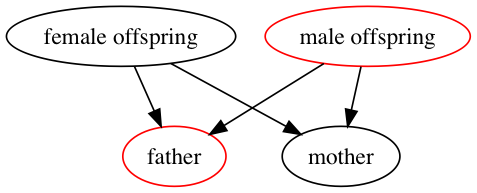

In [1]:
import networkx as nx
from nxpd import draw
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_node('father', color='red')
G.add_node('mother', color='black')
G.add_node('female offspring', color='black')
G.add_node('male offspring', color='red')
G.add_edge('male offspring', 'father')
G.add_edge('male offspring', 'mother')
G.add_edge('female offspring', 'father')
G.add_edge('female offspring', 'mother')
draw(G, show='ipynb')

Directionality is significant. Edges are drawn from the offspring to the parent to ensure the second constraint is observed. For the purposes of clarity in further discussion, we arbitrarily choose female offspring to be $vertex_{1}$, male ofspring to be $vertex_{2}$, father to be $vertex_{3}$ and mother to be $vertex_{4}$.

## Adjacency Matrix

In graph theory an adjacency matrix is a square matrix used to represent the graph. The elements of the matrix are 1 if there is an edge between the nodes represented by the column index and the row index. Slightly more formally, with a graph of vertex set *V*, the adjacency matrix is a square |*V*| x |*V*| matrix, *A*, such that $A_{ij}$ is one when there is an edge from $vertex_{i}$ to $vertex_{j}$ and zero otherwise.

The example graph above would be represented by the following adjacency matrix.

\begin{vmatrix}
0 & 0 & 1 & 1 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{vmatrix}

### Red-Black Graph Adjacency Matrix

The Red-Black adjacency matrix is a square matrix used to represent the Red-Black graph. The elements are 2 if there is an edge between any vertex and a red vertex, 3 if there is an edge between any vertex and a black vertex. Additionally the diagonal is 0 if the vertex is red and 1 if the vertex is black. Slightly more formally, with a graph of vertex set *V*, where a vertex may be colored either *Red* or *Black*, the Red-Black adjacency matrix is a square |*V*| x |*V*| matrix, *A<sub>rb</sub>*, such that *A<sub>rb<sub>ij</sub></sub>* is:
* 1 if *i* == *j* and $vertex_{i}$ is *Black*
* 2 if there is an edge from $vertex_{i}$ to $vertex_{j}$ and $vertex_{j}$ is *Red*
* 3 if there is an edge from $vertex_{i}$ to $vertex_{j}$ and $vertex_{j}$ is *Black*
* 0 otherwise

With this definition, the example graph above would be represented by the following Red-Black adjacency matrix. 

\begin{vmatrix}
1 & 0 & 2 & 3 \\
0 & 0 & 2 & 3 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{vmatrix}

This leads to the first result *TR(A<sub>rb</sub>)* = number of black nodes in *V* and |*V*| - *TR(A<sub>rb</sub>)* = number of red nodes in *V*. 

## Transitive Closure of a Red-Black Adjacency Matrix

Transitive closure for an adjacency matrix, *A*, results in a matrix, *A<sup>+</sup>* that shows all vertices that are reachable from any given vertex. We will examine a method for computing the transitive closure of a Red-Black graph that not only provides rechability, but also designates the reachability relationship between two nodes as a single number.

### Pedigree Numbers and Generations

In recording familial relationships it is common to use a pedigree chart to present record a *downstream* view for a given person. 

![pedigree chart](img/pedigree.jpg)

Note that in the above pedigree chart, the father's position is labeled "2", the mothers's "3", the paternal grandfather's "4", etc. Such a labeling of pedigree positions or vertices has some interesting properties, including:

* All male vertices are labeled with an even number, and all female vertices are labeled with an odd number
* The generation, or how many edges must be followed to connect the root vertex with a given vertex, can be derived by taking the integral portion of $log_{2}$ of the vertex label. (Another way of expressing this is: if the pedigree number is represented in binary form, the generation is the positional value of the left most 1.)

We'll designate this labeling of the *downstream* view of a given vertex in a Red-Black graph as *pedigree numbers*. A simple implementation of the *generation* function follows:

In [11]:
def generation(pedigree_number):
  x = pedigree_number
  gen = 0
  while (x > 1): 
    x >>= 1
    gen+=1
  return gen

### Transitive Relationship Function

Let's examine a transitive relationship. Assume that we have 3 vertices, $vertex_{a}$, $vertex_{b}$ and $vertex_{c}$. Further, let's assume that $vertex_{b}$ is related to $vertex_{a}$ as defined by *pedigree_number* **x**, and that $vertex_{c}$ is related to $vertex_{b}$ by *pedigree_number* **y**. Therefor $vertex_{c}$ is related to $vertex_{a}$ by some *pedigree_number* **z**. We define the *avos* function or operator as:  **x** *avos* **y** = **z**. (Note: *avos* is latin for ancestor.)

Let's use a concrete example as follows: $vertex_{a}$ is any person; $vertex_{b}$ is that person's paternal grandfather (pedigree_number == 4); $vertex_{c}$ is $vertex_{b}$'s maternal grandmother (pedigree_number == 7). If we were to transcribe $vertex_{b}$'s pedigree into the proper place in $vertex_{a}$'s pedigree we'd see that $vertex_{c}$ has a pedigree_number of 19 in $vertex_{a}$'s pedigree. In other words, **4** *avos* **7** == **19**.

In order to uncover the arithmetic for this operator, let's look at the *pedigree numbers* for a few examples. We'll list the pedigree numbers both in base10 and in binary. In all cases, we'll assume that **I** am the person represented by $vertex_{a}$. The first column describes **my** relationship to $vertex_{b}$, the second column describes $vertex_{b}$'s relationship to $vertex_{c}$, the third column is the *pedigree number* that represents **my** relationship to $vertex_{b}$, the forth column is the *pedigree number* that represents $vertex_{b}$
s relationship to $vertex_{c}$, the final column is the *pedigree number* that represents **my** relationship to $vertex_{c}$ or **x** *avos* **y** where **x** == pn(me, b) and **y** == pn(b, c).

| b's relationship to me | c's relationship to b | pn(me, b) | pn(b, c) | pn(me, c) |
| ---------------------- | --------------------- | --------- | -------- | --------- |
| father                 | father                | 2         | 2        | 4         |
| father                 | mother                | 2         | 3        | 5         |
| mother                 | father                | 3         | 2        | 6         |
| mother                 | mother                | 3         | 3        | 7         |
| father                 | paternal grandfather  | 2         | 4        | 8         |
| maternal grandmother   | paternal grandfather  | 7         | 4        | 28        |

While there appears to be some sort of "counting" going on, it isn't obvious what function could be used to arrive at the correct result.

Let's look at the same information, but recase the numbers into base2.

| b's relationship to me | c's relationship to b | pn(me, b) | pn(b, c) | pn(me, c) |
| ---------------------- | --------------------- | --------- | -------- | --------- |
| father                 | father                | 10        | 10       | 100       |
| father                 | mother                | 10        | 11       | 101       |
| mother                 | father                | 11        | 10       | 110       |
| mother                 | mother                | 11        | 11       | 111       |
| father                 | paternal grandfather  | 10        | 100      | 1000      |
| maternal grandmother   | paternal grandfather  | 111       | 100      | 11100     |

While perhaps not obvious, upon examination of the binary representation, we see that the *avos* operator simply replaces the left most significant digit of pn(b,c)<sub>base2</sub> with the value of pn(me,b)<sub>base2</sub>.

A simple implementation of the *avos* function follows:


In [51]:
def avos(x, y):
    # the avos product is a transitive relationship operator. 
    # Given that:
    #   - vertex a is related to vertex b by x
    #   - vertex b is related to vertex c by y
    # This product should return the value indicating how a is related to c
    
    # The domain of this function is all positive integers greater than 1
    if x <= 1 or y <= 1:
        raise ValueError(f'avos({x}, {y}) is not defined')
    
    # There are some edge cases that need to be considered, namely what is meant 
    generationNumber = generation(y)
    return (y & (2 **generationNumber - 1)) | (x << generationNumber)


We'll refer to this transitive relationship funciton as the *avos* product for scalers.

### Transitive Closure for Red-Black Adjacency Matrix

We will define the transitive closure of a Red-Black adjacency matrix, *A<sub>rb</sub>* as *A<sub>rb</sub><sup>+</sup>* such that element (i, j) is the *pedigree number* that represents the relationship between $vertex_{i}$ and $vertex_{j}$. Furthermore *A<sub>rb</sub><sup>+</sup>* can be computed from *A<sub>rb</sub>* using a modified Warshall Algorithm.

In [87]:
def warshall(M):
    n = len(M)
    W = M
    for k in range(n):
        for i in range(n):
            for j in range(n):
                element_avos = 0
                if W[i][k] > 1 and W[k][j] > 1:
                    W[i][j] = avos(W[i][k], W[k][j])
                else:
                    W[i][j] = W[i][j]
    return W

In [89]:
#print(warshall([[0,2,3,0,0],[0,0,0,2,0],[0,0,1,0,0],[0,0,0,0,0],[2,0,0,0,1]]))

Let's look at the Red-Black adjacency matrix, *A<sub>rb</sub>*, for the following graph:

* vertex 0 - male offspring of vertex 1 and vertex 2
* vertex 1 - male offspring of vertex 3 and unknown (not in graph)
* vertex 2 - female offspring of unknown (neither in graph)
* vertex 3 - male offsprint of unknown (neither in graph)
* vertex 4 - female offsprint of vertex 0 and unknown (not in graph)

\begin{vmatrix}
0 & 2 & 3 & 0 & 0 \\
0 & 0 & 0 & 2 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
2 & 0 & 0 & 0 & 1 \\
\end{vmatrix}

Running this modified Warshall algorithm against this example matrix results in the following *A<sub>rb</sub><sup>+</sup>*:

\begin{vmatrix}
0 & 2 & 3 & 4 & 0 \\
0 & 0 & 0 & 2 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
2 & 4 & 5 & 8 & 1 \\
\end{vmatrix}

### Observations

For the purpose of discussion/analysis, for any given node, *N*, in a Red Black Graph we introduce two "views":

1. *Downstream* - The subgraph constructed by taking *N* and selecting those nodes that can be reached by following output edges only
2. *Upstream* - The subgraph constructed by selecting all nodes and edges such that *N* can be reached by following outbound edges

Given *A<sub>rb</sub><sup>+</sup>*, observe that:

* row vectors represent *downstream* view for a given vertex
* column vectors represent *upstream* view for a given vertex
* row vectors representing siblings will be identical
* column vectors representing siblings may be independant if either of the siblings have offspring represented in the graph
* determining whether *x* is an ancestor of *y* is **O**(1) and provided by *A<sub>rb</sub><sup>+</sup>*<sub>x,y</sub>
* determining whether *x* is a descendant of *y* is **O**(1) and provided by *A<sub>rb</sub><sup>+</sup>*<sub>y,x</sub>
* determining whether *x* is related to *y* is **O**(*m*) where *m* is the expected number of ancestors and *m* << |*V*|. Relationship is determined by element-wise comparision of the non zero elements of row vectors of x and y. When an element has both non zero in both row vectors the relationship is determined by the *pedigree numbers* of the respective row vector elements. (see xxxx)
* diameter of the graph is generation(max(*A<sub>rb</sub><sup>+</sup>*<sub>i,j</sub>))
* number of black vertices = Tr(*A<sub>rb</sub><sup>+</sup>*)




## Linear Algebra

### *avos* Product for Vectors

Now that we've defined the Red-Black adjacency matrix, *pedigree numbers*, the *generation* function and the *avos* product for scalers, we can begin to explore extensions to linear algebra. We'll first do so by defining the *avos* product for two vectors. 

Assuming 0 indexing in the tha matrix, the 4th row vector is an incomplete *downstream* view for $vertex_{4}$ while the 2nd column vector is an incomplete *upstream* view for $vertex_{2}$. You can see that $vertex_{4}$ is related to $vertex_{2}$ (by *pedigree number* 5). We would like to define the *avos* dot product of these two vectors to provide a scaler that is the *pedigree number* of this relationship:

\begin{equation*}
\begin{vmatrix}
2 & 0 & 0 & 0 & 1 \\
\end{vmatrix}
\cdot
\begin{vmatrix}
3 \\
0 \\
1 \\
0 \\
0 \\
\end{vmatrix}
= 5
\end{equation*}

The vector dot product, summing element-wise products, results in a scaler value of 6. We'd like to take a similar approach for the vector avos product. There are two issues:
1. The domain of the *avos* product is positive integers > 1, so an pairwise products with a 0 or a 1 are excluded and the element-wise product is considered to be zero.
2. It is possible for there to be multiple paths through the graph bewteen two nodes. If that were the case, then summing the element-wise *avos* product would not result in the *pedigree number* representing the relationship from $vertex_{a}$ to $vertex_{c}$. For the *avos* vector product, rather than summing the element-wise products we arbitrarily choos the non-zero minimum element-wise product, thus representing the "closest" relationship between $vertex_{a}$ and $vertex_{c}$.

A simple implementation of the *avos* vector product follows:

In [91]:
def vec_avos(x, y):
    # if clause on list comprehension screens out input outside domain of avos
    # min over the list arbitrarily chooses "nearest" relationship
    try:
        return min([avos(a, b) for a, b in zip(x, y) if a > 1 and b > 1])
    except ValueError as e:
        # if there are no element-wise avos results, min will run across an empty sequence and
        # through a ValueError...
        return 0


### Matrix multiplication

With scaler and vector *avos* products defined, extension to matrices is elementary. Given *A* and *B*, both matrices following the contraints defined for Red-Black adjacency matrices, and *C* = *A* x *B*, the elements of C<sub>ij</sub> are given by:
* if i != j, the vector *avos* product of *row vector<sub>i</sub>* from A and *column vector<sub>j</sub>* from B
* if i == j and *A<sub>ij</sub>* == *B<sub>ij</sub>*, *A<sub>ij</sub>*
* otherwise, undefined.

Matrix multiplication of Red-Black adjacency matrices may seem a little abstract so let's consider a practical example to motivate the analysis. Given a Red-Black adjacency matrix, *A<sub>rb</sub>*, the result of *A<sub>rb</sub>*<sup>2</sup> shows all vertices directly related by following up to 2 relationship edges, the result of *A<sub>rb</sub>*<sup>3</sup> shows all vertices related by following up to 3 relationship edges, etc. For some *n* <= |*V*| there will be a *A<sub>rb</sub>*<sup>n</sup> == *A<sub>rb</sub><sup>+</sup>*.

### Vector Classifications

Within the context of *A<sub>rb</sub><sup>+</sup>, we will define several vector classes. These vectors each represent a vertex (red or black) not yet in the graph.

* *simple row vector* - represented by *v<sub>s</sub>*. Elements are constrained to values of 0, 2 or 3 with at most 1 element of 2 and at most 1 element of 3. The element positions that are non-zero represent a direct edge to the vertex corresponding to the element index.
* *simple column vector* - represented by *u<sub>s</sub>*. Elements are constrained to have elements with values of 0, and 2 if the vertex is *red* or 3 if the vertex is *black*. The element positions that are non-zero represent a direct edge from the vertices corresponding to the element indices.
* *closed row vector* - represented by *v<sub>c</sub>*. Elements are constrained to values of 0, and positive integers greater than 1. The element positions that are non-zero represent the transitively closed relationships between the vertex represented by this vector and the vertices in the graph.
* *closed column vector* - represented by *u<sub>c</sub>*. Elements are constrained to values of 0, and even positive integers greater than 1 if the vertex is red or odd positive integers greater than 1 if the vertex is black. The element positions that are non-zero represent the transitively closed relationships from the vertices in the graph to this vector.

With these definitions, the following is observed:

1. *v<sub>s</sub>* x *A<sub>rb</sub><sup>+</sup> = *v<sub>c</sub>*
2. *A<sub>rb</sub><sup>+</sup> x *u<sub>s</sub>* = *u<sub>c</sub>*

### Relational Composition

The question arise how to correctly update *A<sub>rb</sub><sup>+</sup>* with the addition of new vertices to the graph. We propose an algorithm that is relatively simple in concept that generates *A<sup>'</sup><sub>rb</sub><sup>+</sup>*. Consider adding a vertex to the graph corresponding to *A<sub>rb</sub><sup>+</sup>* of size *N*. We define a relational composition that can be used to add a new node to the graph and produce *A<sup>'</sup><sub>rb</sub><sup>+</sup>* of size *N* + 1. Conceptually:

*A<sup>'</sup><sub>rb</sub><sup>+</sup>* = *v* *A<sub>rb</sub><sup>+</sup>* *u*

Precisely this relational composition is accomplished by:

1. generate *v<sub>c</sub>* (given by observation 1 above)
2. generate *u<sub>c</sub>* (given by observation 2 above)
3. *A<sup>'</sup><sub>rb</sub><sup>+</sup>* is composed by:
    1. appending *v<sub>c</sub>* as a new row
    2. appending *u<sub>c</sub>* as a new column
    3. setting element *A<sup>'</sup><sub>rb</sub><sup>+</sup>*<sub>N+1, N+1</sub> to 0 if vertex is red, and 1 if vertex is black
    4. For each row, r, where *v<sub>c<sub>i</sub></sub>* != 0, set *A<sup>'</sup><sub>rb</sub><sup>+</sup>*<sub>r,i</sub> = *v<sub>c<sub>r</sub></sub>* avos *u<sub>c<sub>i</sub></sub>*

## Areas of Further investigation

* Eigenvalues
* Loop prevention
* *avos* properties (commutitivity, associativity, distribution, identity, inverse, etc.)
* Spectral Graph Theory
* Explore ideas to reduce dimensionality (embedding similar to word2vec, etc.)

## Conclusions

TODO: outline properties
TODO: outline "am I related"